# Homework 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#These are the libraries that will be used for our models
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, learning_curve

# Understanding Data

I am first going to read in the data for both the training and testing set. I need to see what kind of data I am working with and see the types of data in the sets.

In [2]:
train_data = pd.read_csv("/Users/nicksteil/Desktop/all/train.csv")

In [3]:
test_data = pd.read_csv("/Users/nicksteil/Desktop/all/test.csv")

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape #gives the number of rows and columns of training data set

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
train_data.info() #see which variables are categorical or numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From looking at the data description that is provided in the competition, I am going to look at the relationship of a few variables to see which ones might affect the sale price of the home in the training data. This will help me explore which variables are key predictors for sale price of my data.

Text(0.5,1,'Overall Quality and Sale Price')

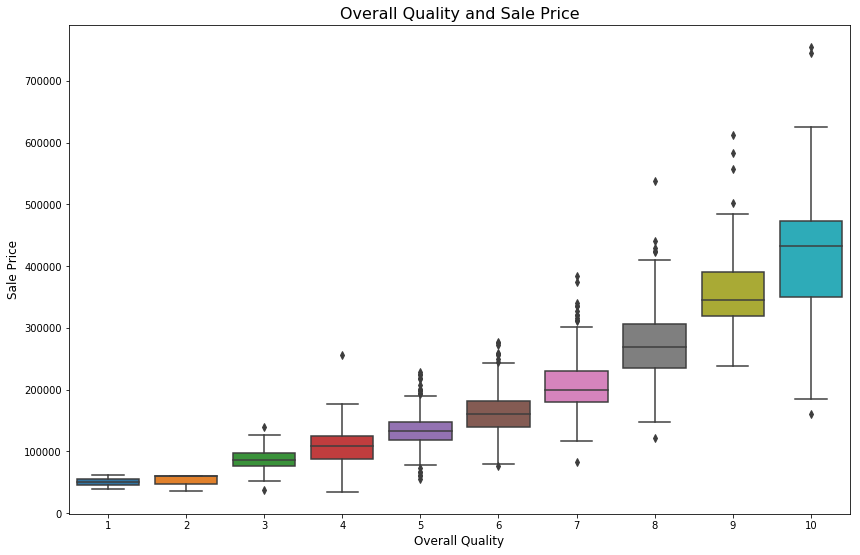

In [8]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='OverallQual', y = 'SalePrice', data = train_data)
plt.xlabel('Overall Quality', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Overall Quality and Sale Price', fontsize = 16)

Text(0.5,1,'Overall Condition and Sale Price')

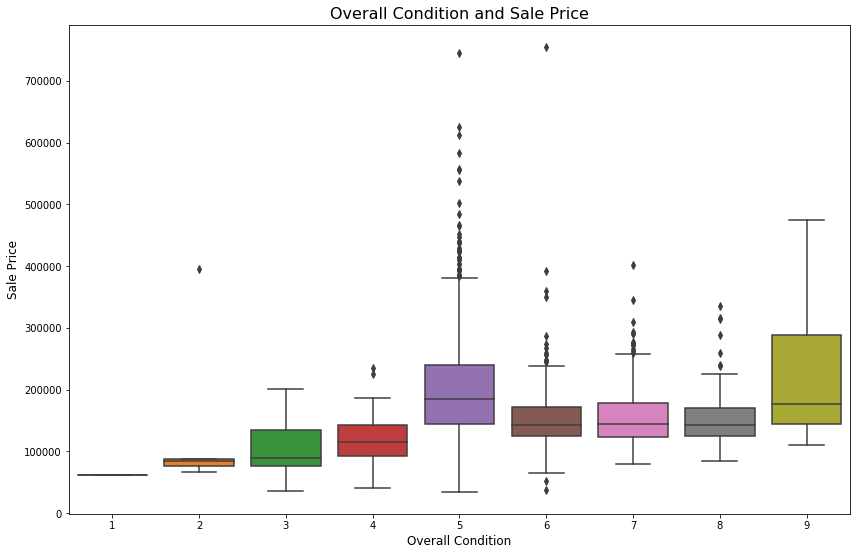

In [9]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='OverallCond', y = 'SalePrice', data = train_data)
plt.xlabel('Overall Condition', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Overall Condition and Sale Price', fontsize = 16)

While still a positive trend, the relationship between sale price and overall condition is not as strong as overall quality in the previous graph.

Text(0.5,1,'House Style and Sale Price')

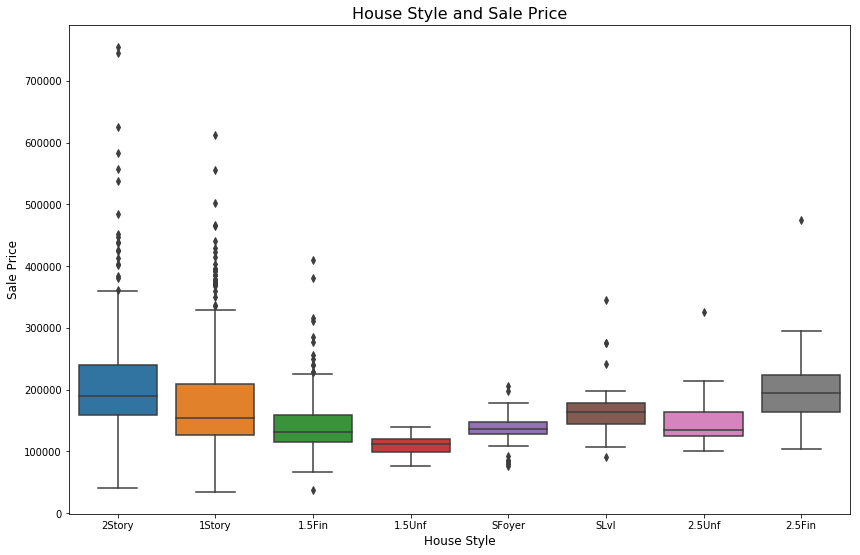

In [10]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='HouseStyle', y = 'SalePrice', data = train_data)
plt.xlabel('House Style', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('House Style and Sale Price', fontsize = 16)

Text(0.5,1,'Total Rooms and Sale Price')

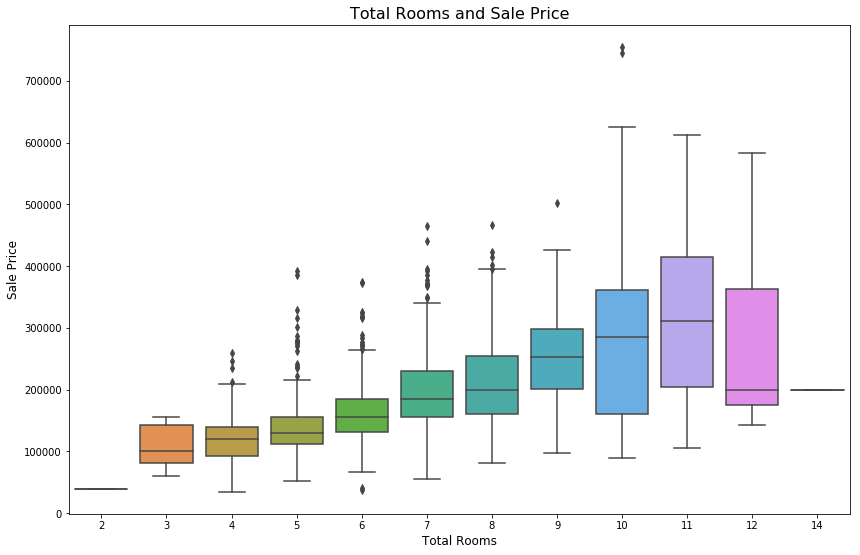

In [11]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='TotRmsAbvGrd', y = 'SalePrice', data = train_data)
plt.xlabel('Total Rooms', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Total Rooms and Sale Price', fontsize = 16)

Text(0.5,1,'Sale Price and Living Area')

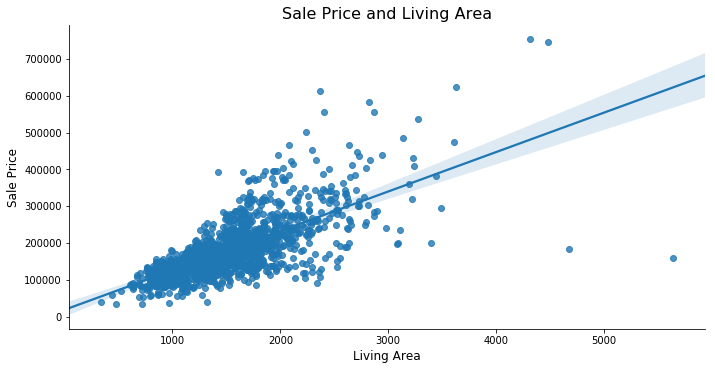

In [12]:
ax = sns.lmplot(x = "GrLivArea", y = "SalePrice", data = train_data, aspect = 2)
plt.xlabel('Living Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.title('Sale Price and Living Area', fontsize=16)

I am interested in seeing how sale price from the training data is distributed.

Text(0.5,1,'Distribution of Sales Prices')

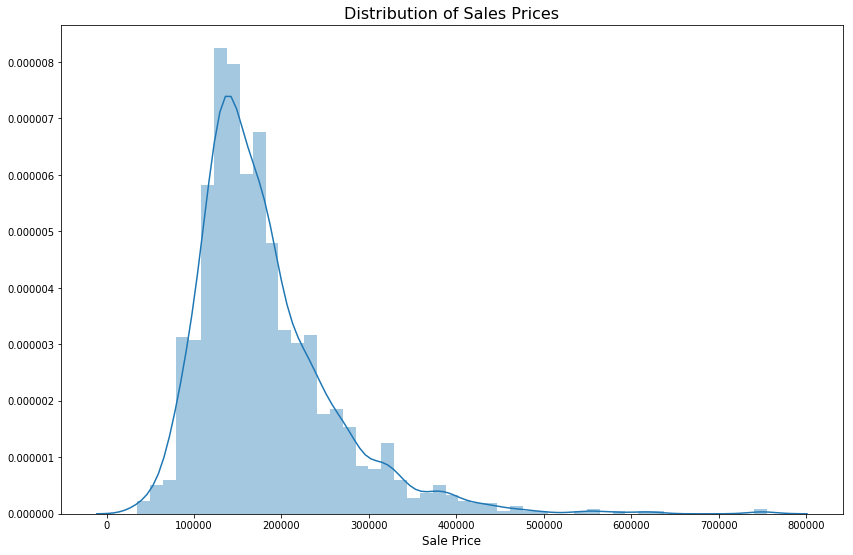

In [13]:
fig, ax = plt.subplots(figsize = (14,9))
sns.distplot(train_data['SalePrice'])
plt.xlabel('Sale Price', fontsize = 12)
plt.title('Distribution of Sales Prices', fontsize = 16)

Since the distribution of sale price is skewed right, this is problematic. Many of our models that are available to use assume that the dependent variable is normally distributed. I am going to use Ln(1 + Sale Price) transformation in order so that sale price is now normally distributed.

Text(0.5,1,'Distribution of Log Sale Price')

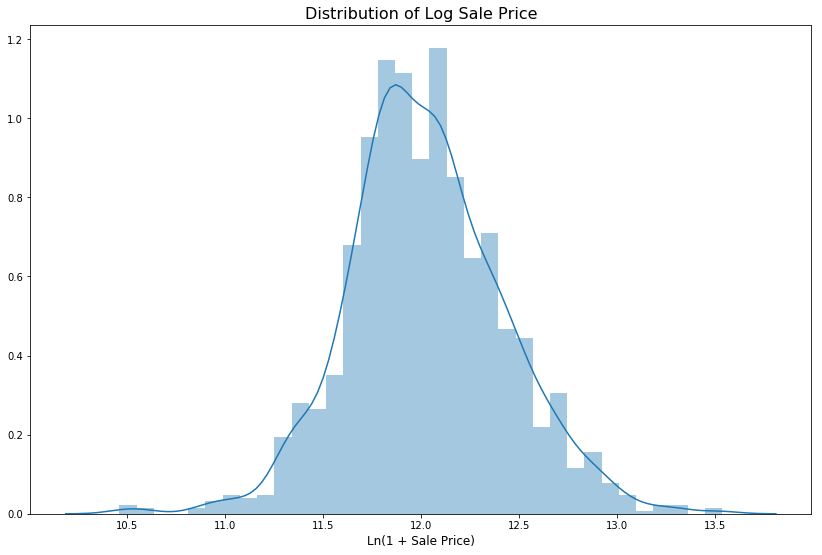

In [14]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])
fig, ax = plt.subplots(figsize=(14, 9))
sns.distplot(train_data['SalePrice'])
plt.xlabel("Ln(1 + Sale Price)", fontsize=12)
plt.title('Distribution of Log Sale Price', fontsize=16)

# Filling Missing Data

Now with an idea for might be some key relationships amongst our variables in the data, I need to go ahead and fill in the missing values in both the testing and training sets. I am going to combine both data sets into a single one so that it will be easier to impute missing values. I am going to drop both the sale price column from the testing set and the Id column from both.

In [17]:
sale_price = train_data['SalePrice'] #this is my target variable before it will be dropped
rows_train = train_data.shape[0]     #get the number of rows from training set
total_data = pd.concat((train_data.drop('SalePrice',axis = 1),test_data)).reset_index(drop=True)
total_data = total_data.drop('Id', axis = 1)

In [18]:
total_data.shape

(2919, 79)

In [19]:
missing = (total_data.isnull().sum() / len(total_data))*100
missing.drop(missing[missing == 0].index).sort_values(ascending = False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
Electrical       0.034258
KitchenQual      0.034258
GarageCars       0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
dtype: float64

The table above lists all of the variables in the combined data set that have missing values and the percent of their respective columns that are missing. Looking at the data description file that was provided, many of the categorical variables have an option of "NA". I fill those varibles' columns missing values with "N/A"

In [20]:
columns = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
           'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for col in columns:
    total_data[col] = total_data[col].fillna('N/A')

For numerical categories with missing values, I will just fill their missing values with 0.

In [21]:
num_col_missing = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea','MasVnrArea',
                   'BsmtFullBath','BsmtHalfBath','GarageYrBlt']
for col in num_col_missing:
    total_data[col] = total_data[col].fillna(0)

Functional and SaleType variables have a default if the respective house is not listed as one of the options from the data set. For the missing values, I will fill in with the default.

In [22]:
total_data['Functional'] = total_data['Functional'].fillna("Typ")
total_data['SaleType'] = total_data['SaleType'].fillna("Oth")

For these next categorical columns that did not have an "NA" option, I will fill in the missing values with the most common one from their respective column.

In [23]:
more_cat = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual']
for col in more_cat:
    total_data[col] = total_data[col].fillna(total_data[col].mode()[0])

For lot frontage, I will fill in the missing values with the mean.

In [24]:
total_data['LotFrontage'] = total_data['LotFrontage'].fillna(total_data['LotFrontage'].mean())

In [25]:
#Convert numerical inputs to strings since they should be categorical data
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)
total_data['MSSubClass'] = total_data['MSSubClass'].astype(str)
total_data['OverallCond'] = total_data['OverallCond'].astype(str)

In [26]:
total_data.isnull().any().sum()

0

We now have no missing values.

# Modeling

With a data cleaned, I will go through with trying to find the best model to predict the sale price of each house.

In [29]:
total_data = pd.get_dummies(total_data) #get dummy variables for all our categorical data

In [30]:
train = total_data[:rows_train] #extract the train and test sets of data
test = total_data[rows_train:]

In [31]:
train.shape

(1460, 341)

This function will take in a model and return the rmse of the model from the test set.

In [32]:
def get_rmse(model, data, target):
    rmse = np.sqrt(-cross_val_score(model, data, target, scoring = "neg_mean_squared_error", cv = 5))
    return rmse.mean()

I am going to use three different kinds of models that use regularization to see which one performs the best. Each of these place additional constraints on our cost function and they help with the problem of overfitting. Lasso adds the constraint of the sum of the absolute value of the coefficients. Ridge adds the constraing of the sum of the square of the coefficients and ElasticNet is a combination of the two. Regularization helps drive some the coefficients to zero and it will help maximize our predictive power once we get out of sample and we use the test data.

In [39]:
score = get_rmse(Lasso(),train, sale_price)
print("The RMSE for Lasso is %3f" % score)

The RMSE for Lasso is 0.196387


In [40]:
score = get_rmse(Ridge(),train, sale_price)
print("The RMSE for Ridge is %3f" % score)

The RMSE for Ridge is 0.145042


In [41]:
score = get_rmse(ElasticNet(),train, sale_price)
print("The RMSE for ElasticNet is %3f" % score)

The RMSE for ElasticNet is 0.189167


In [36]:
ridge_model = Ridge().fit(train.values, sale_price.values)

In [37]:
ridge_predict = np.expm1(ridge_model.predict(test.values)) #need to transform back 

In [42]:
#rmse with test data: 0.13576
submission = pd.DataFrame({'Id':test_data['Id'],'SalePrice': ridge_predict})
submission.to_csv("submission.csv",index=False)

The Ridge model worked best in the test case compared to the other models with regularization. In order to improve the Ridge model, we can tune the hyperparameters to see which one will get us the best rmse. Also, some feature engineering could work really well to improve the model.